### Inference using the YOLO pytorch model

In [99]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 10342, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10342 (delta 1), reused 4 (delta 0), pack-reused 10334
Receiving objects: 100% (10342/10342), 10.59 MiB | 5.13 MiB/s, done.
Resolving deltas: 100% (7139/7139), done.
Updating files: 100% (104/104), done.
Defaulting to user installation because normal site-packages is not writeable


Move test files to a seperate folder

In [100]:
import shutil
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

with open('VOC2007/ImageSets/Main/test.txt', 'r') as file:
    test_list = file.read().split("\n")[:-1]
test_images = [os.path.join('VOC2007/JPEGImages', x+'.jpg') for x in test_list]
with open('VOC2007/ImageSets/Main/test_paths.txt', 'w') as file:
    file.write("\n".join(test_images))

!mkdir -p YOLO5/images/test
move_files_to_folder(test_images, 'YOLO5/images/test/')

detect licence plate

In [117]:
%cd yolov5
!python3 detect.py --source ../VOC2007/ImageSets/Main/test_paths.txt --weights ../best.pt --conf 0.3 --device cpu --name out_test

[Errno 2] No such file or directory: 'yolov5'
/mnt/c/Codes/ANP_Detection/yolov5
detect: weights=['../best.pt'], source=../VOC2007/ImageSets/Main/test_paths.txt, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=out_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu102 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
^C
qt.qpa.xcb: could not connect to display 172.27.48.1:0
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/home/shiv/.local/lib/python3.8/site-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix thi

Average inference speed = pre-process_time + inference_time + NMS_time = 1.2+127+0.7 ms = 0.1289ms \
Which is (0.1289)^-1 = 7.759 frames per second

*The above logs can also be found in `inference_logs.txt` file. This file describes the required time taken by each test image and avg time*

Open a random image from the outputs of this model

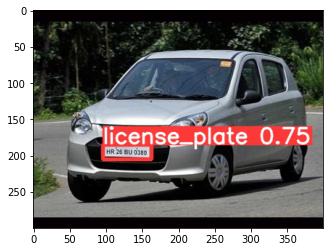

In [105]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
detections_dir = "runs/detect/YOLO_ANPR_640_100EPS_det/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

Now, calculate the mAP metric on test split provided in the dataset. This must be >0.7

In [ ]:
with open('data.yaml', 'w+') as f:
    f.write('path: ../YOLO5\n')
    f.write('train: images/train/\n')
    f.write('val: images/val/\n')
    f.write('test: images/test/\n')
    f.write('\nnc: 1\n')
    f.write('\nnames: ["license_plate"]\n')
!mv data.yaml data/data.yaml

In [108]:
!python3 val.py --weights ../best.pt --device cpu --data data.yaml --task test --name yolo_det

val: data=/mnt/c/Codes/ANP_Detection/yolov5/data/data.yaml, weights=['../best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=cpu, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu102 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

Traceback (most recent call last):
  File "val.py", line 370, in <module>
    main(opt)
  File "val.py", line 343, in main
    run(**vars(opt))
  File "/home/shiv/.local/lib/python3.8/site-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "val.py", line 142, in run
    data = check_dataset(data)  # check
  File "/mnt/c/Codes/ANP_Detection/yolov5/utils/general.py", line 416, in check_dataset
    raise Exception('Dataset not found.')

We get an mAP of 0.884. which is >0.7 . 🎉🎉